<center>
  <img src="https://www.inteli.edu.br/wp-content/uploads/2022/04/28103439/Logo-Container.png" />
</center>

# `[SI10-2024-P1]` - Prova Prática

Sistemas de Informação - Módulo 10 - Turma 4



**Nome**: Maria Luísa Vilaronga Maia

**ANTES DE PROSSEGUIR FAÇA UMA CÓPIA DESTE NOTEBOOK**

----

## Contexto

Uma plataforma online, que atua na venda de produtos, deseja otimizar sua interface para melhorar a experiência do usuário e aumentar as taxas de conversão. Recentemente, a empresa implementou um redesign de sua página web, e os registros dessa mudança estão detalhados nos dados coletados desde então. As variáveis registradas diariamente incluem o número de visitantes únicos, sessões, taxa de rejeição, páginas por sessão, principais origens do tráfego, tipos de dispositivos usados, eventos ocorridos, taxa de conversão e o tempo médio de sessão.

Com base nesses dados, a empresa considera realizar uma mudança similar para otimizar ainda mais sua plataforma. Antes de proceder, a equipe deseja empregar simulações de Monte Carlo para avaliar os possíveis impactos de um novo redesign na taxa de conversão, tempo médio de sessão e taxa de rejeição, utilizando análises estatísticas para prever tendências futuras e ajustar estratégias de maneira informada. Essa abordagem visa garantir que as decisões tomadas maximizem as taxas de conversões, fundamentais para o sucesso contínuo da plataforma.

## Importação do dataset e das bibliotecas

In [1]:
# Importação do dataset
# https://drive.google.com/file/d/1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr/view?usp=drive_link
!gdown 1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr

Downloading...
From: https://drive.google.com/uc?id=1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr
To: /content/ITL-SI10-2024-P1-dataset.csv
100% 7.03k/7.03k [00:00<00:00, 18.9MB/s]


In [2]:
# Importação das bibliotecas
import pandas as pd

# Transforma o dataset em DataFrame Pandas
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')
print(df.head())

         Data  Visitantes Únicos  Sessões  Taxa de Rejeição (%)  \
0  2023-01-01              113.0    126.0             50.496714   
1  2023-01-02               90.0    157.0             49.438007   
2  2023-01-03               92.0    185.0             49.800231   
3  2023-01-04              130.0    206.0             50.251843   
4  2023-01-05              123.0    155.0             48.070931   

   Páginas por Sessão Principais Origens do Tráfego Dispositivos  Eventos  \
0            1.834201                        Direto      Desktop        8   
1            1.955760                        Social      Desktop        5   
2            2.285052                        Direto      Desktop        9   
3            2.325464                          Pago       Mobile        6   
4            2.267006                        Direto      Desktop        6   

   Taxa de Conversão (%)  Tempo Médio de Sessão (minutos)  
0               1.952083                         5.395516  
1             

## Questões

### Questão 1

**Análise Exploratória de Dados**: Faça a exploração dos dados, utilizando gráficos interativos. Identifique correlações entre as variáveis e apresente essas relações em uma matriz de correlação focada nas variáveis mais relevantes para a conversão de vendas.

In [22]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
df.head(10)

,Data,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Principais Origens do Tráfego,Dispositivos,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
0,2023-01-01,113.0,126.0,50.496714,1.834201,Direto,Desktop,8,1.952083,5.395516
1,2023-01-02,90.0,157.0,49.438007,1.955760,Social,Desktop,5,2.066180,4.680899
2,2023-01-03,92.0,185.0,49.800231,2.285052,Direto,Desktop,9,2.058858,5.972584
3,2023-01-04,130.0,206.0,50.251843,2.325464,Pago,Mobile,6,2.134617,4.705854
4,2023-01-05,123.0,155.0,48.070931,2.267006,Direto,Desktop,6,2.420236,5.835801
5,2023-01-06,148.0,191.0,47.647219,2.362449,Orgânico,Mobile,9,2.559353,6.773194
6,2023-01-07,150.0,197.0,49.036840,2.662313,Direto,Mobile,4,2.501274,5.318291
7,2023-01-08,146.0,202.0,47.801333,2.356262,Pago,Desktop,9,2.693574,5.666004
8,2023-01-09,137.0,284.0,46.140695,2.651792,Social,Desktop,2,2.714130,6.134571
9,2023-01-10,131.0,254.0,46.729001,2.569731,Social,Desktop,10,2.698200,5.968601


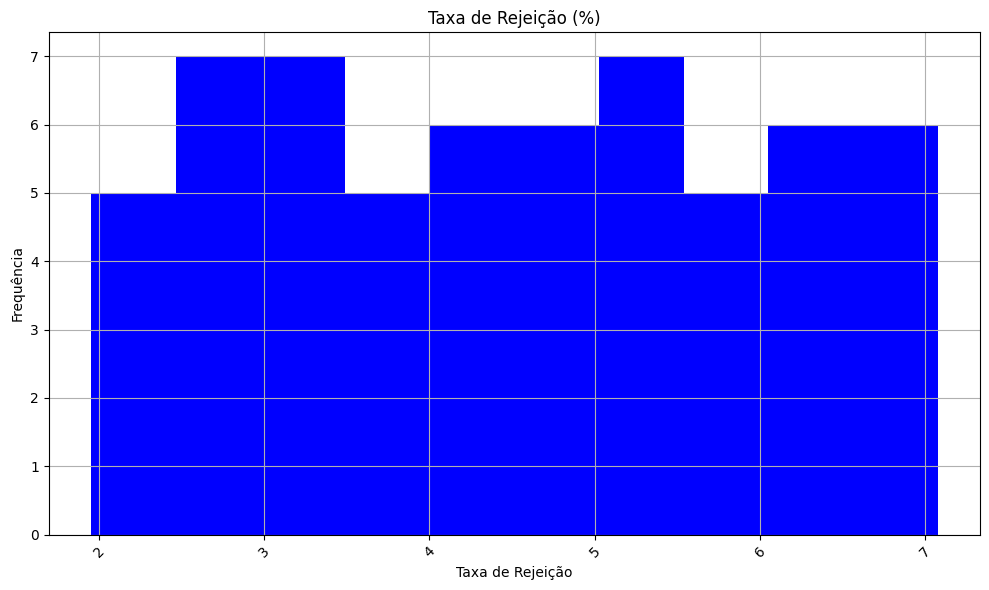

In [5]:
plt.figure(figsize=(10, 6))
df['Taxa de Conversão (%)'].plot(kind='hist', color='b')
plt.title('Taxa de Rejeição (%)')
plt.xlabel('Taxa de Rejeição')
plt.ylabel('Frequência')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

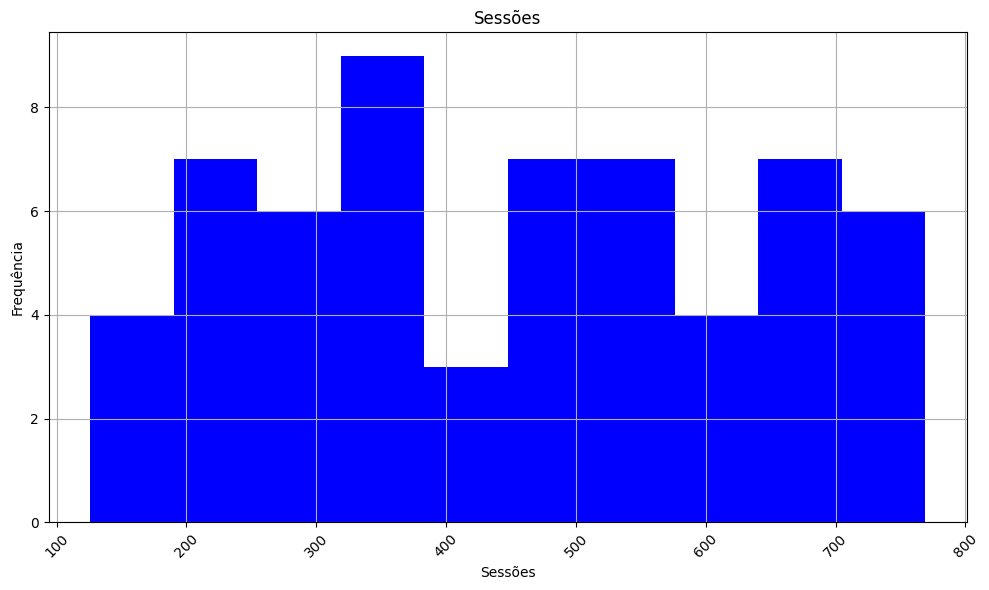

In [6]:
plt.figure(figsize=(10, 6))
df['Sessões'].plot(kind='hist', color='b')
plt.title('Sessões')
plt.xlabel('Sessões')
plt.ylabel('Frequência')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
df['Month_Year'] = pd.to_datetime(df['Data']).dt.to_period('M')

average_pageviews_by_month_year = df.groupby('Month_Year')['Sessões'].mean()

print("Média do número de pageviews por mês e ano:")
print(average_pageviews_by_month_year)

Média do número de pageviews por mês e ano:
Month_Year
2023-01    299.774194
2023-02    603.750000
2023-03    769.000000
Freq: M, Name: Sessões, dtype: float64


In [8]:
average_pageviews_by_month_year

Month_Year
2023-01    299.774194
2023-02    603.750000
2023-03    769.000000
Freq: M, Name: Sessões, dtype: float64

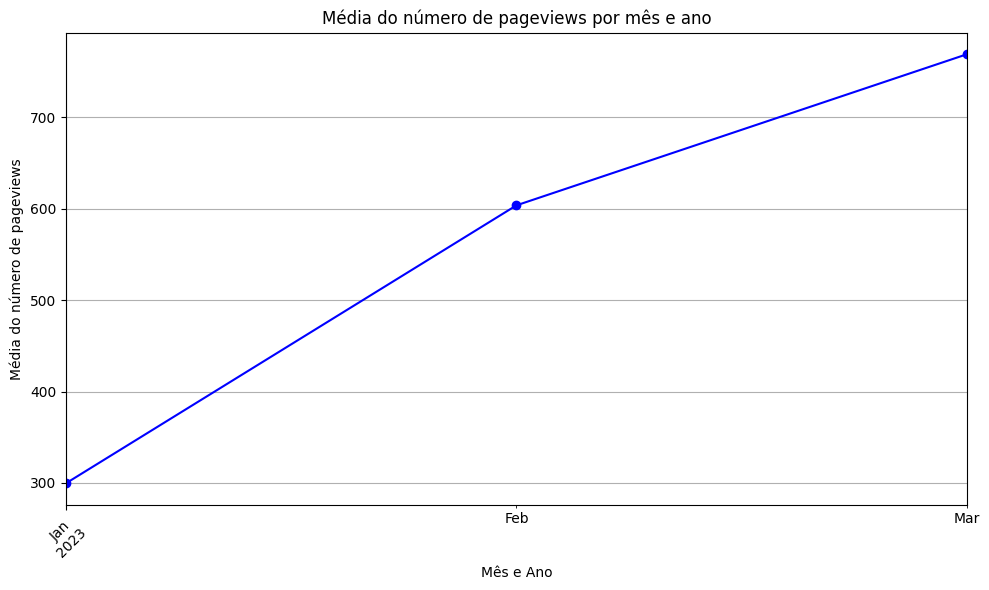

In [9]:
plt.figure(figsize=(10, 6))
average_pageviews_by_month_year.plot(kind='line', marker='o', color='b')
plt.title('Média do número de pageviews por mês e ano')
plt.xlabel('Mês e Ano')
plt.ylabel('Média do número de pageviews')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

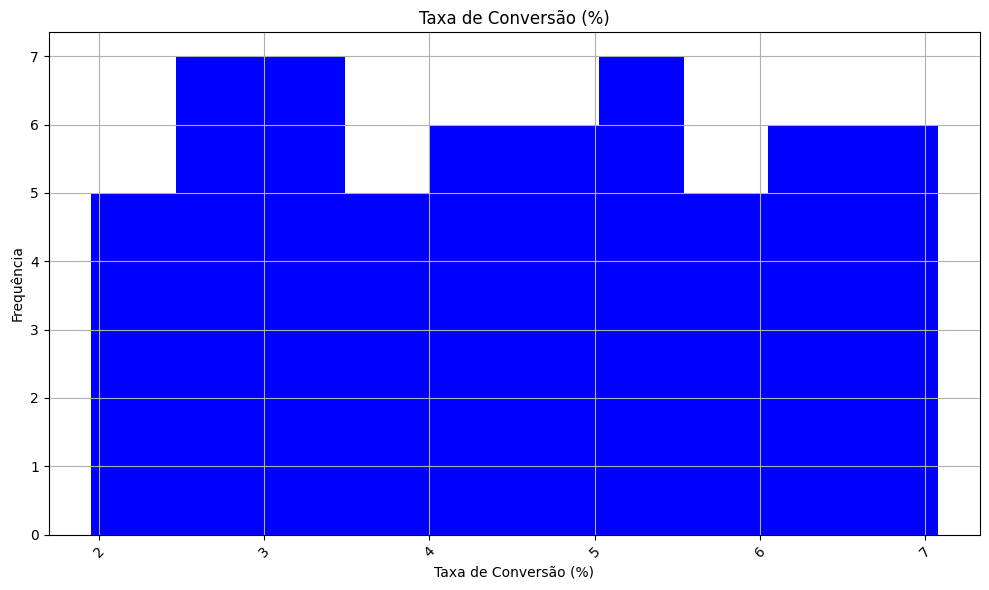

In [10]:
plt.figure(figsize=(10, 6))
df['Taxa de Conversão (%)'].plot(kind='hist', color='b')
plt.title('Taxa de Conversão (%)')
plt.xlabel('Taxa de Conversão (%)')
plt.ylabel('Frequência')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
df['Conversão'] = pd.to_datetime(df['Data']).dt.to_period('M')

conversao_by_month_year = df.groupby('Conversão')['Taxa de Conversão (%)'].mean()

print("Média da taxa de conversão por mês e ano:")
print(conversao_by_month_year)

Média da taxa de conversão por mês e ano:
Conversão
2023-01    3.272747
2023-02    5.765984
2023-03    7.075193
Freq: M, Name: Taxa de Conversão (%), dtype: float64


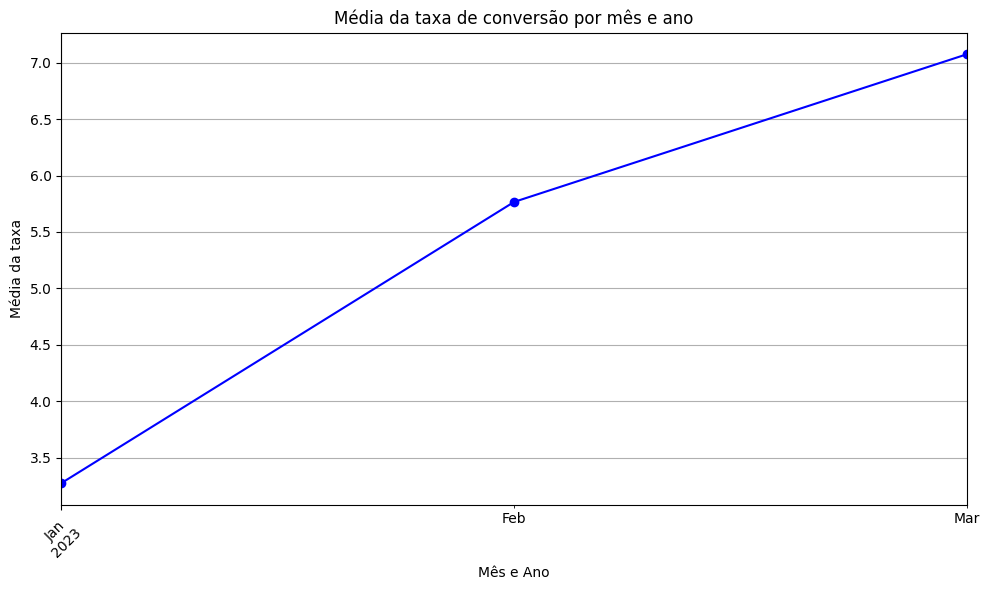

In [12]:
plt.figure(figsize=(10, 6))
conversao_by_month_year.plot(kind='line', marker='o', color='b')
plt.title('Média da taxa de conversão por mês e ano')
plt.xlabel('Mês e Ano')
plt.ylabel('Média da taxa')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

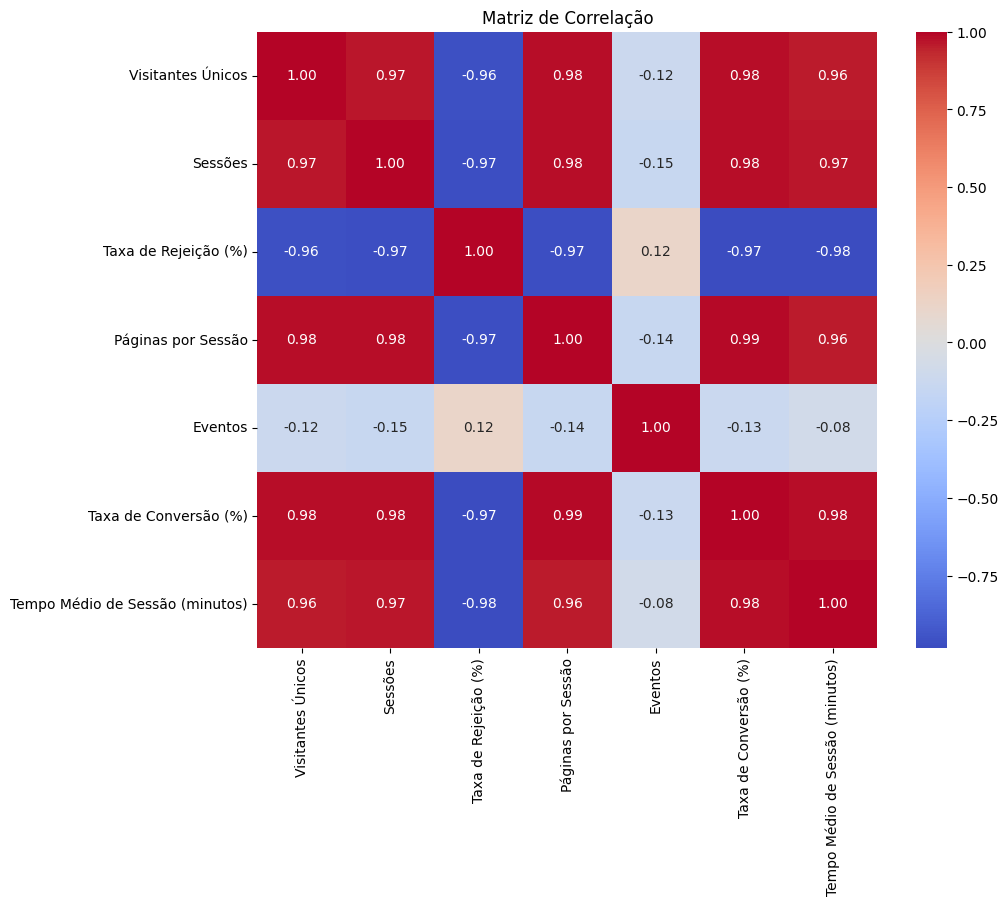

In [13]:
df_numeric = df.select_dtypes(include=[np.number])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlação')
plt.show()


### Questão 2

**Simulação de Monte Carlo**: Implemente uma simulação de Monte Carlo para avaliar os possíveis efeitos de um novo redesign na plataforma. Analise como diferentes variáveis podem impactar os resultados e discuta os cenários que esta simulação pode prever, ajudando a empresa a tomar decisões mais informadas sobre o redesign.

Simulação 1

In [14]:
df.head(10)

,Data,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Principais Origens do Tráfego,Dispositivos,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos),Month_Year,Conversão
0,2023-01-01,113.0,126.0,50.496714,1.834201,Direto,Desktop,8,1.952083,5.395516,2023-01,2023-01
1,2023-01-02,90.0,157.0,49.438007,1.955760,Social,Desktop,5,2.066180,4.680899,2023-01,2023-01
2,2023-01-03,92.0,185.0,49.800231,2.285052,Direto,Desktop,9,2.058858,5.972584,2023-01,2023-01
3,2023-01-04,130.0,206.0,50.251843,2.325464,Pago,Mobile,6,2.134617,4.705854,2023-01,2023-01
4,2023-01-05,123.0,155.0,48.070931,2.267006,Direto,Desktop,6,2.420236,5.835801,2023-01,2023-01
5,2023-01-06,148.0,191.0,47.647219,2.362449,Orgânico,Mobile,9,2.559353,6.773194,2023-01,2023-01
6,2023-01-07,150.0,197.0,49.036840,2.662313,Direto,Mobile,4,2.501274,5.318291,2023-01,2023-01
7,2023-01-08,146.0,202.0,47.801333,2.356262,Pago,Desktop,9,2.693574,5.666004,2023-01,2023-01
8,2023-01-09,137.0,284.0,46.140695,2.651792,Social,Desktop,2,2.714130,6.134571,2023-01,2023-01
9,2023-01-10,131.0,254.0,46.729001,2.569731,Social,Desktop,10,2.698200,5.968601,2023-01,2023-01


In [15]:
df['Data'] = pd.to_datetime(df['Data'])
df_taxa = df[['Data', 'Taxa de Conversão (%)']]
df_taxa

,Data,Taxa de Conversão (%)
0,2023-01-01,1.952083
1,2023-01-02,2.066180
2,2023-01-03,2.058858
3,2023-01-04,2.134617
4,2023-01-05,2.420236
5,2023-01-06,2.559353
6,2023-01-07,2.501274
7,2023-01-08,2.693574
8,2023-01-09,2.714130
9,2023-01-10,2.698200


In [17]:
data_inicio_mudancas = pd.Timestamp('2023-02-01')

dados_antes = df_taxa[df_taxa['Data'] < data_inicio_mudancas]
dados_depois = df_taxa[df_taxa['Data'] >= data_inicio_mudancas]

media_antes_conversao = dados_antes['Taxa de Conversão (%)'].mean()
media_depois_conversao = dados_depois['Taxa de Conversão (%)'].mean()
std_antes_conversao = dados_antes['Taxa de Conversão (%)'].std()
std_depois_conversao = dados_depois['Taxa de Conversão (%)'].std()

def simular_impacto_detalhado(n_simulacoes):
    resultados = []
    detalhes_contribuicoes = []

    for _ in range(n_simulacoes):
        contribuicao_ui = np.random.uniform(0, 1)
        contribuicao_velocidade = np.random.uniform(0, 1 - contribuicao_ui)

        ajuste_por_ui = (media_depois_conversao - media_antes_conversao) * contribuicao_ui
        ajuste_por_velocidade = (media_depois_conversao - media_antes_conversao) * contribuicao_velocidade

        novas_sessoes = np.random.normal(abs(media_antes_conversao + ajuste_por_ui + ajuste_por_velocidade), std_depois_conversao)
        resultados.append(novas_sessoes)
        detalhes_contribuicoes.append((contribuicao_ui, contribuicao_velocidade, abs(ajuste_por_ui), abs(ajuste_por_velocidade)))

    return resultados, detalhes_contribuicoes

n_simulacoes = 10000
resultados_simuladas, contribuicoes_simuladas = simular_impacto_detalhado(n_simulacoes)

resultados_simuladas = [max(0, sessao) for sessao in resultados_simuladas]
resultados_simuladas = [int(sessao) for sessao in resultados_simuladas]

data_resultados_sessoes = pd.DataFrame({
    'Taxas de Conversão Simuladas': resultados_simuladas
})

fig_sessoes = px.histogram(data_resultados_sessoes, x='Taxas de Conversão Simuladas', nbins=50,
                            title='Distribuição do Taxas de Conversão Simuladas após Mudanças',
                            labels={'axas de Conversão Simuladas': 'Taxas de Conversão'},
                            opacity=0.8)
fig_sessoes.add_vline(x=media_antes_conversao, line_dash="dash", line_color="red", annotation_text="Média Antes")
fig_sessoes.add_vline(x=media_depois_conversao, line_dash="dash", line_color="green", annotation_text="Média Depois")
fig_sessoes.update_layout(xaxis_title='Número de Sessões', yaxis_title='Frequência')
fig_sessoes.show()

### Questão 3

**Análise de Sensibilidade**: Realize uma análise de sensibilidade para examinar como alterações em diferentes variáveis de entrada afetam as previsões da taxa de conversão.

In [18]:
df.head(5)

,Data,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Principais Origens do Tráfego,Dispositivos,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos),Month_Year,Conversão
0,2023-01-01,113.0,126.0,50.496714,1.834201,Direto,Desktop,8,1.952083,5.395516,2023-01,2023-01
1,2023-01-02,90.0,157.0,49.438007,1.955760,Social,Desktop,5,2.066180,4.680899,2023-01,2023-01
2,2023-01-03,92.0,185.0,49.800231,2.285052,Direto,Desktop,9,2.058858,5.972584,2023-01,2023-01
3,2023-01-04,130.0,206.0,50.251843,2.325464,Pago,Mobile,6,2.134617,4.705854,2023-01,2023-01
4,2023-01-05,123.0,155.0,48.070931,2.267006,Direto,Desktop,6,2.420236,5.835801,2023-01,2023-01


In [19]:
fig = px.scatter(
    df,
    x="Tempo Médio de Sessão (minutos)",
    y="Taxa de Conversão (%)",
    trendline="ols",
    title="Relação entre Tempo de Sessão e Taxa de Conversão",
    labels={"Tempo Médio de Sessão (minutos)": "Tempo Médio de Sessão (min)",
            "Taxa de Conversão (%)": "Taxa de Conversão (%)"}
)
fig.update_layout(
    xaxis_title="Tempo Médio de Sessão (min)",
    yaxis_title="Taxa de Conversão (%)",
    height=500,
    width=800
)
fig.show()

In [20]:
fig = px.scatter(
    df,
    x="Taxa de Rejeição (%)",
    y="Taxa de Conversão (%)",
    trendline="ols",
    title="Relação entre Taxa de Rejeição e Taxa de Conversão",
    labels={"Taxa de Rejeição (%)": "Taxa de Rejeição (%)",
            "Taxa de Conversão (%)": "Taxa de Conversão (%)"}
)
fig.update_layout(
    xaxis_title="Taxa de Rejeição (%)",
    yaxis_title="Taxa de Conversão (%)",
    height=500,
    width=800
)
fig.show()

In [21]:
corr_df = df.filter(['Taxa de Rejeição (%)', 'Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)'])
corr_df.corr()

,Taxa de Rejeição (%),Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
Taxa de Rejeição (%),1.000000,-0.974824,-0.982036
Taxa de Conversão (%),-0.974824,1.000000,0.976846
Tempo Médio de Sessão (minutos),-0.982036,0.976846,1.000000


## Entrega

Siga esses passos para entregar sua prova.

1. Crie um repositório no GitHub para essa entrega.

2. Submeta seu desenvolvimento neste repositório.

3. Garanta que o repositório é publicamente acessível (eliminatório).

4. No Google forms da prova, submeta a URL do repositório.